In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv("/content/iris.csv")
df2=pd.read_csv("/content/letter-recognition.csv")
print("Iris\n",df1.head())
print("Letter recognition\n",df2.head())

Iris
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Letter recognition
   letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar   \
0      T      2      8       3       5       1      8     13      0       6   
1      I      5     12       3       7       2     10      5      5       4   
2      D      4     11       6       8       6     10      6      2       6   
3      N      7     11       6       6       3      5      9      4       6   
4      G      2      1       3       1       1      8      6      6       6   

   xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
0       6      10       8

IRIS

In [ ]:
X_iris = df1.drop('species', axis=1)
y_iris = df1['species']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_iris, y_train_iris)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_iris, y_train_iris)

SVC(random_state=42)

In [ ]:
y_pred_linear = svm_linear.predict(X_test_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)

# Accuracy and Confusion Matrix for Linear Kernel
accuracy_linear = accuracy_score(y_test_iris, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test_iris, y_pred_linear)

# Accuracy and Confusion Matrix for RBF Kernel
accuracy_rbf = accuracy_score(y_test_iris, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test_iris, y_pred_rbf)

# Display Results
print(f"Linear Kernel Accuracy: {accuracy_linear}")
print(f"RBF Kernel Accuracy: {accuracy_rbf}")

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 1.0


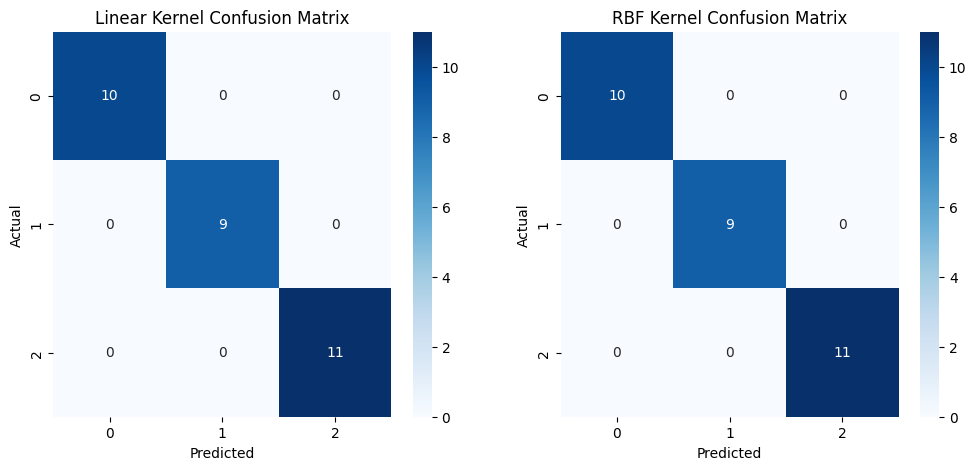

In [ ]:
# Confusion Matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title("Linear Kernel Confusion Matrix")
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title("RBF Kernel Confusion Matrix")
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()

LETTER RECOGNITION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

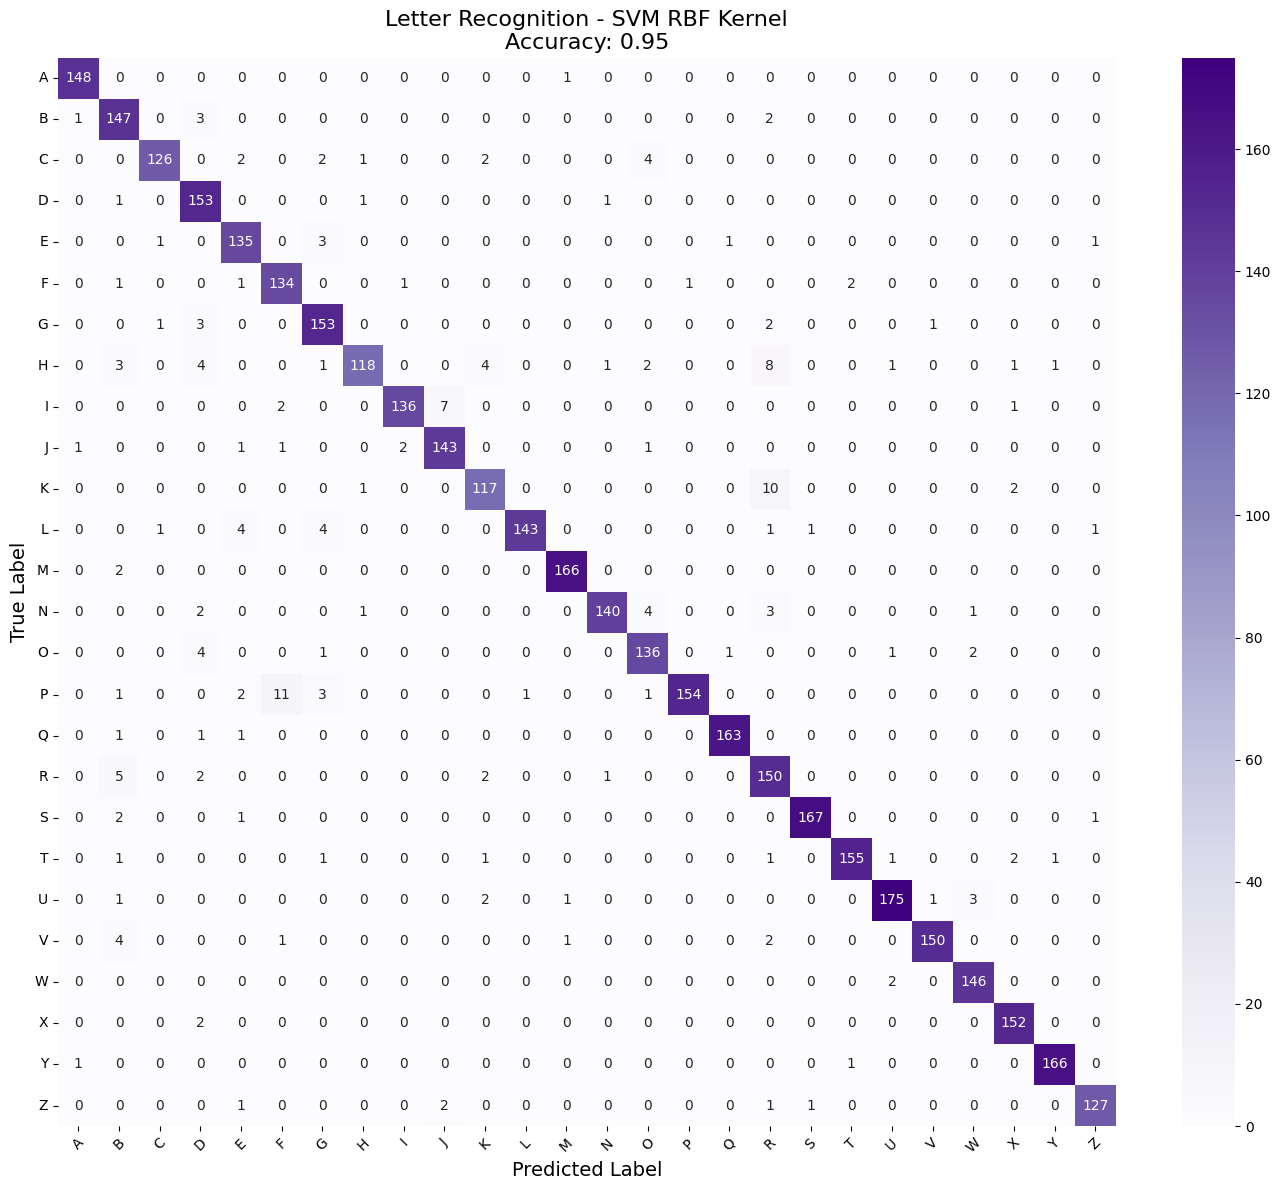

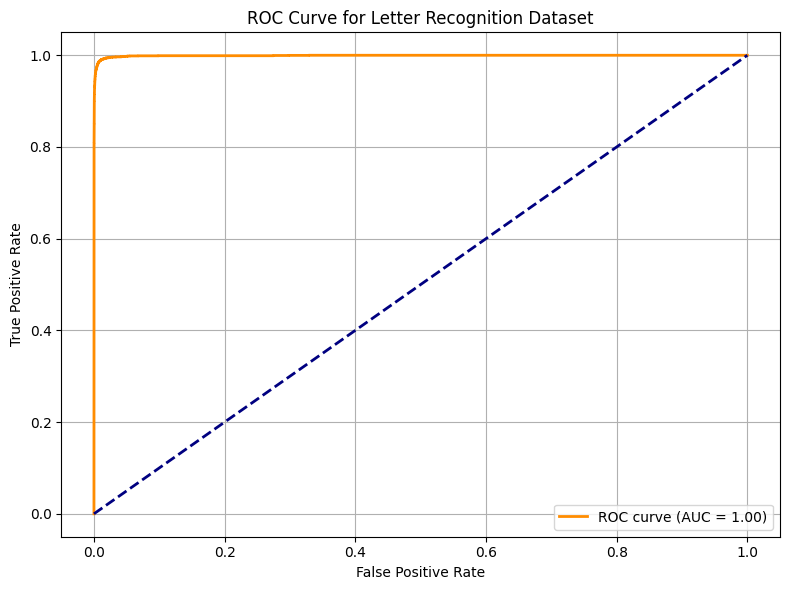

In [ ]:
letters = pd.read_csv("/content/letter-recognition.csv")

X_letters = letters.drop('letter', axis=1)
y_letters = letters['letter']

label_encoder_letters = LabelEncoder()
y_letters_encoded = label_encoder_letters.fit_transform(y_letters)
class_names_letters = label_encoder_letters.classes_

X_train_letters, X_test_letters, y_train_letters, y_test_letters = train_test_split(X_letters, y_letters_encoded, test_size=0.2, random_state=42)

scaler_letters = StandardScaler()
X_train_letters = scaler_letters.fit_transform(X_train_letters)
X_test_letters = scaler_letters.transform(X_test_letters)

svm_letters = SVC(kernel='rbf', probability=True)
svm_letters.fit(X_train_letters, y_train_letters)
y_pred_letters = svm_letters.predict(X_test_letters)

acc_letters = accuracy_score(y_test_letters, y_pred_letters)
cm_letters = confusion_matrix(y_test_letters, y_pred_letters)

plt.figure(figsize=(14, 12))
sns.heatmap(cm_letters, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names_letters,
            yticklabels=class_names_letters,
            cbar=True)

plt.title(f'Letter Recognition - SVM RBF Kernel\nAccuracy: {acc_letters:.2f}', fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

y_test_binarized = label_binarize(y_test_letters, classes=np.unique(y_letters_encoded))
y_score = svm_letters.predict_proba(X_test_letters)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
auc_score = roc_auc_score(y_test_binarized, y_score, average='macro')

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()